## Simulate Dataset Using Deeplenstronomy

In [2]:
import deeplenstronomy.deeplenstronomy as dl
from pathlib import Path
import numpy as np
from astropy.visualization import make_lupton_rgb
import matplotlib.pyplot as plt

In [5]:
def rename_result(name, head):
    """
    Renames files in the 'deeplenstronomy' repository to match the folder name.

    Args:
        name (str): The name of the folder where data is to be stored (as specified in the config.yaml file).
        head (Path): A Pathlib Path object representing the root directory containing the 'data/' and 'sim/' subdirectories.

    Returns:
        None
    """
    
    datapath = head / f'data/{name}'
    imgpath = datapath / 'CONFIGURATION_1_images.npy'
    mdpath = datapath / 'CONFIGURATION_1_metadata.csv'
    if imgpath.exists():
        imgpath.rename(datapath / (datapath.name + '.npy'))
    if mdpath.exists():
        mdpath.rename(datapath / (datapath.name + '_metadata.csv'))

In [ ]:
head = Path.cwd().parent.parent
config_file = head / 'sim/configs/source_config.yaml'
dataset = dl.make_dataset(config_file, verbose=True, save_to_disk=True)

In [4]:
rename_result('mb_paper_source_final', head)

In [ ]:
head = Path.cwd().parent.parent
config_file = head / 'sim/configs/target_config.yaml'
dataset = dl.make_dataset(config_file, verbose=True, save_to_disk=True)

In [ ]:
rename_result('mb_paper_target_final', head)

### Sanity Check Images 

In [17]:
# Define data visualization function
def visualize_data(data):
    """
    Visualizes 16 random images from the dataset, and set title as their index. Note that the RGB colors
    are generated simplistically so lens/source galaxy colors may look unusual.

    Args:
        data (array-like): The dataset containing images, where each image is expected to be a multi-band array.

    Returns:
        None
    """
    
    data_length = len(data)
    num_indices = 16
    
    # Generate 16 unique random indices using numpy
    random_indices = np.random.choice(data_length, size=num_indices, replace=False)

    fig1=plt.figure(figsize=(8,8))

    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.axis("off")

        img = data[random_indices[i]]
        example_image = make_lupton_rgb(img[2], img[1], img[0] * 1.5)
        plt.title(random_indices[i])
        plt.imshow(example_image, aspect='auto')


In [18]:
head = Path.cwd().parents[1]
source_img_path = head / 'data/mb_paper_source_final/mb_paper_source_final.npy'
source_meta = head / 'data/mb_paper_source_test/mb_paper_source_test_metadata.csv'

targ_img_path = head / 'data/mb_paper_target_final/mb_paper_target_final.npy'
targ_meta = head / 'data/mb_paper_target_final/mb_paper_target_final_metadata.csv'

In [19]:
sdata = np.load(source_img_path)
tdata = np.load(targ_img_path)

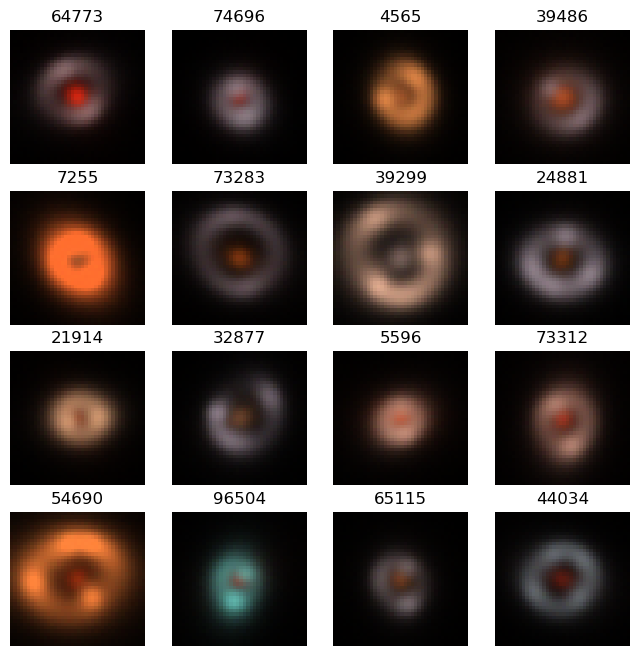

In [20]:
visualize_data(sdata)

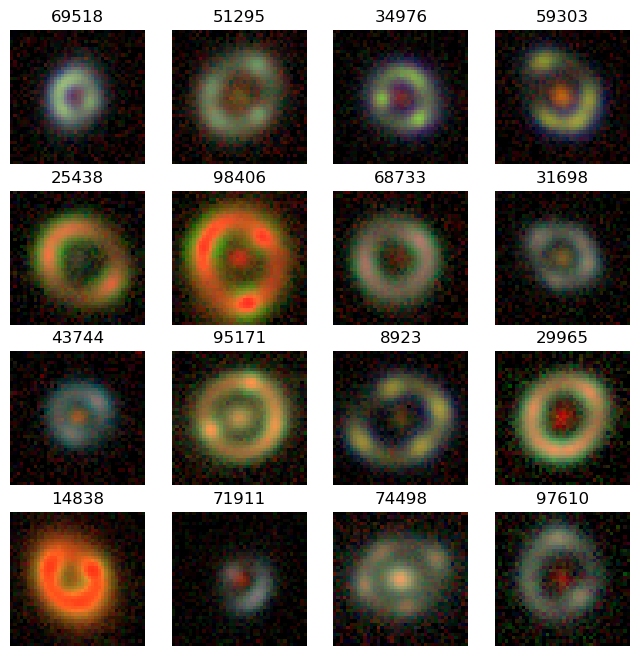

In [21]:
visualize_data(tdata)

### Sanity Check Labels 

In [30]:
import pandas as pd
smeta = pd.read_csv(source_meta)
tmeta = pd.read_csv(targ_meta)

In [33]:
# Find column in labels table
[i for i in smeta.keys() if 'theta' in i]

['PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g',
 'PLANE_2-OBJECT_1-MASS_PROFILE_1-theta_E-g',
 'PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-r',
 'PLANE_2-OBJECT_1-MASS_PROFILE_1-theta_E-r',
 'PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-z',
 'PLANE_2-OBJECT_1-MASS_PROFILE_1-theta_E-z']

In [34]:
# For example, these are the lens magnitudes/colors
smeta[['PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-g', 'PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-r', 'PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-z']].head()

,PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-g,PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-r,PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-z
0,21.736526,20.287542,18.577364
1,21.725147,20.610872,19.945261
2,23.109276,21.841541,20.850832
3,22.030613,20.840246,20.832485
4,18.373186,18.031454,17.947552


In [35]:
# For example, these are the source magnitudes/colors
smeta[['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g', 'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-r', 'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-z']].head()

,PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g,PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-r,PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-z
0,21.488290,20.546026,20.126022
1,21.870981,21.475230,21.358294
2,19.491915,18.869165,18.601873
3,21.700718,21.114801,20.904348
4,21.881210,20.619070,19.885523


In [36]:
# Seeing for the target varies
tmeta[['seeing-g', 'seeing-r', 'seeing-z']].head()

,seeing-g,seeing-r,seeing-z
0,1.678,1.399,0.882
1,1.418,0.841,0.863
2,1.062,0.943,0.642
3,1.122,0.863,0.841
4,0.962,0.882,0.882


In [37]:
# Seeing for the source does not
smeta[['seeing-g', 'seeing-r', 'seeing-z']].head()

,seeing-g,seeing-r,seeing-z
0,0.9,0.9,0.9
1,0.9,0.9,0.9
2,0.9,0.9,0.9
3,0.9,0.9,0.9
4,0.9,0.9,0.9


In [39]:
# All physical and noise information is within the metadata tables
smeta.head()

,OBJID-g,H0-g,Om0-g,exposure_time-g,numPix-g,pixel_scale-g,psf_type-g,read_noise-g,ccd_gain-g,seeing-g,...,PLANE_2-OBJECT_1-MASS_PROFILE_1-e2-z,PLANE_2-OBJECT_1-MASS_PROFILE_1-center_x-z,PLANE_2-OBJECT_1-MASS_PROFILE_1-center_y-z,BACKGROUND_IDX-z,PLANE_1-REDSHIFT-g,PLANE_2-REDSHIFT-g,PLANE_1-REDSHIFT-r,PLANE_2-REDSHIFT-r,PLANE_1-REDSHIFT-z,PLANE_2-REDSHIFT-z
0,1,70,0.3,1000,40,0.263,GAUSSIAN,0,6.083,0.9,...,-0.1,0.0,0.0,0,0.5,2.0,0.5,2.0,0.5,2.0
1,2,70,0.3,1000,40,0.263,GAUSSIAN,0,6.083,0.9,...,-0.1,0.0,0.0,0,0.5,2.0,0.5,2.0,0.5,2.0
2,3,70,0.3,1000,40,0.263,GAUSSIAN,0,6.083,0.9,...,-0.1,0.0,0.0,0,0.5,2.0,0.5,2.0,0.5,2.0
3,4,70,0.3,1000,40,0.263,GAUSSIAN,0,6.083,0.9,...,-0.1,0.0,0.0,0,0.5,2.0,0.5,2.0,0.5,2.0
4,5,70,0.3,1000,40,0.263,GAUSSIAN,0,6.083,0.9,...,-0.1,0.0,0.0,0,0.5,2.0,0.5,2.0,0.5,2.0


In [40]:
tmeta.head()

,OBJID-g,H0-g,Om0-g,exposure_time-g,numPix-g,pixel_scale-g,psf_type-g,read_noise-g,ccd_gain-g,seeing-g,...,PLANE_2-OBJECT_1-MASS_PROFILE_1-e2-z,PLANE_2-OBJECT_1-MASS_PROFILE_1-center_x-z,PLANE_2-OBJECT_1-MASS_PROFILE_1-center_y-z,BACKGROUND_IDX-z,PLANE_1-REDSHIFT-g,PLANE_2-REDSHIFT-g,PLANE_1-REDSHIFT-r,PLANE_2-REDSHIFT-r,PLANE_1-REDSHIFT-z,PLANE_2-REDSHIFT-z
0,1,70,0.3,90,40,0.263,GAUSSIAN,7,6.083,1.678,...,-0.1,0.0,0.0,0,0.5,2.0,0.5,2.0,0.5,2.0
1,2,70,0.3,90,40,0.263,GAUSSIAN,7,6.083,1.418,...,-0.1,0.0,0.0,0,0.5,2.0,0.5,2.0,0.5,2.0
2,3,70,0.3,90,40,0.263,GAUSSIAN,7,6.083,1.062,...,-0.1,0.0,0.0,0,0.5,2.0,0.5,2.0,0.5,2.0
3,4,70,0.3,90,40,0.263,GAUSSIAN,7,6.083,1.122,...,-0.1,0.0,0.0,0,0.5,2.0,0.5,2.0,0.5,2.0
4,5,70,0.3,90,40,0.263,GAUSSIAN,7,6.083,0.962,...,-0.1,0.0,0.0,0,0.5,2.0,0.5,2.0,0.5,2.0
